### Importación de datos



In [ ]:
%pip install folium


   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import folium 

In [4]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 0. Pre-Análisis

In [5]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
for tienda in tiendas:
    print(tienda.columns)
    print(tienda.info())
    print(tienda.head(1))

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                   

# 1. Análisis de facturación



ingresos totales en cada tiendas: 
Ingreso total de la tienda 1: 1150880400.0
Ingreso total de la tienda 2: 1116343500.0
Ingreso total de la tienda 3: 1098019600.0
Ingreso total de la tienda 4: 1038375700.0


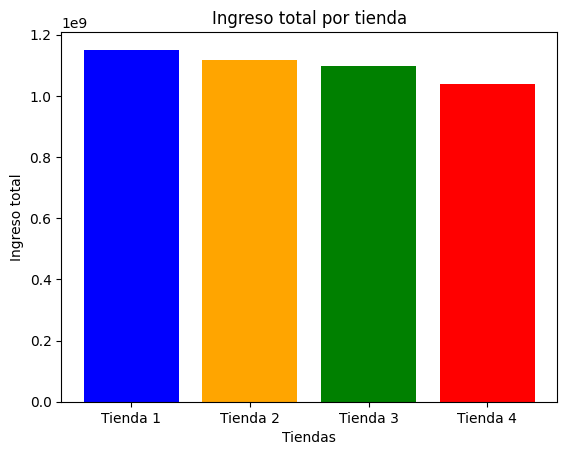

In [ ]:
ingreso_total = []
for tienda in tiendas:
    ingreso_total.append(tienda["Precio"].sum())

print("ingresos totales en cada tiendas: ")
for i, ingreso in enumerate(ingreso_total, start=1):
    print(f"Ingreso total de la tienda {i}: {ingreso}")

plt.bar(range(len(ingreso_total)), ingreso_total, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Tiendas")
plt.ylabel("Ingreso total")
plt.title("Ingreso total por tienda")
plt.xticks(range(len(ingreso_total)), [f"Tienda {i+1}" for i in range(len(ingreso_total))])
plt.show()

# 2. Ventas por categoría

productos vendidos por categoría en cada tienda: 
Tienda 1:
  Muebles: 465
  Electrónicos: 448
  Juguetes: 324
  Electrodomésticos: 312
  Deportes y diversión: 284
  Instrumentos musicales: 182
  Libros: 173
  Artículos para el hogar: 171


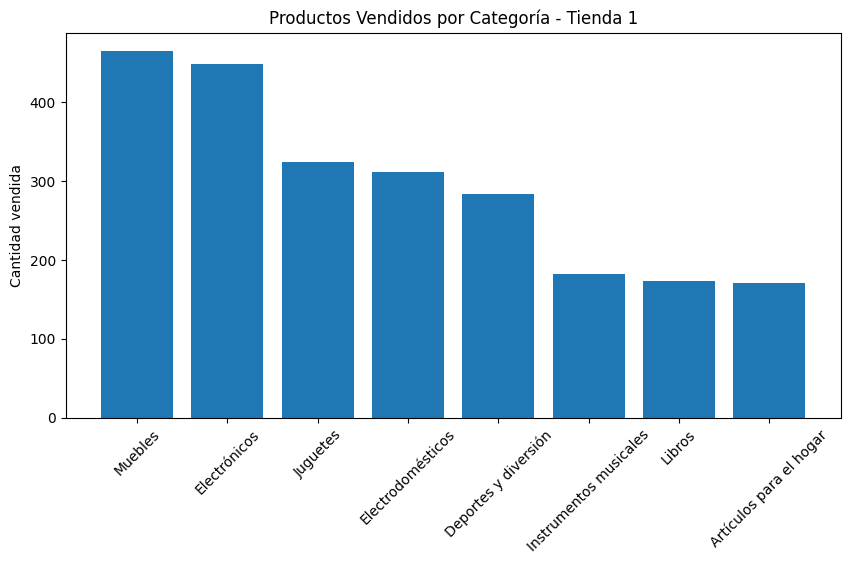

Tienda 2:
  Muebles: 442
  Electrónicos: 422
  Juguetes: 313
  Electrodomésticos: 305
  Deportes y diversión: 275
  Instrumentos musicales: 224
  Libros: 197
  Artículos para el hogar: 181


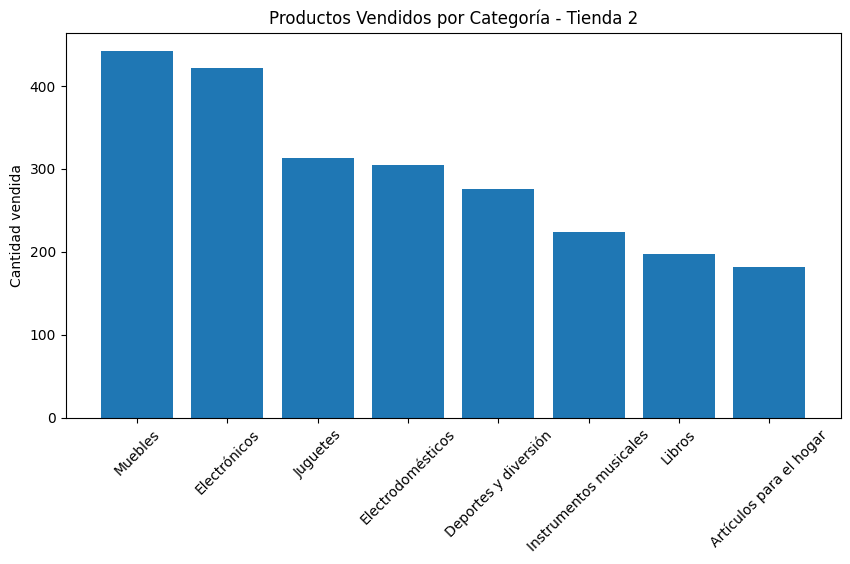

Tienda 3:
  Muebles: 499
  Electrónicos: 451
  Juguetes: 315
  Electrodomésticos: 278
  Deportes y diversión: 277
  Libros: 185
  Artículos para el hogar: 177
  Instrumentos musicales: 177


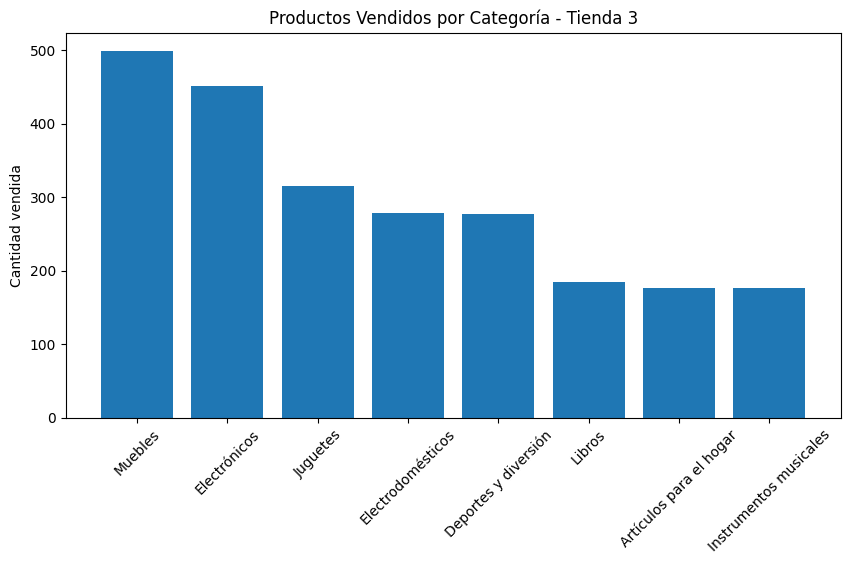

Tienda 4:
  Muebles: 480
  Electrónicos: 451
  Juguetes: 338
  Deportes y diversión: 277
  Electrodomésticos: 254
  Artículos para el hogar: 201
  Libros: 187
  Instrumentos musicales: 170


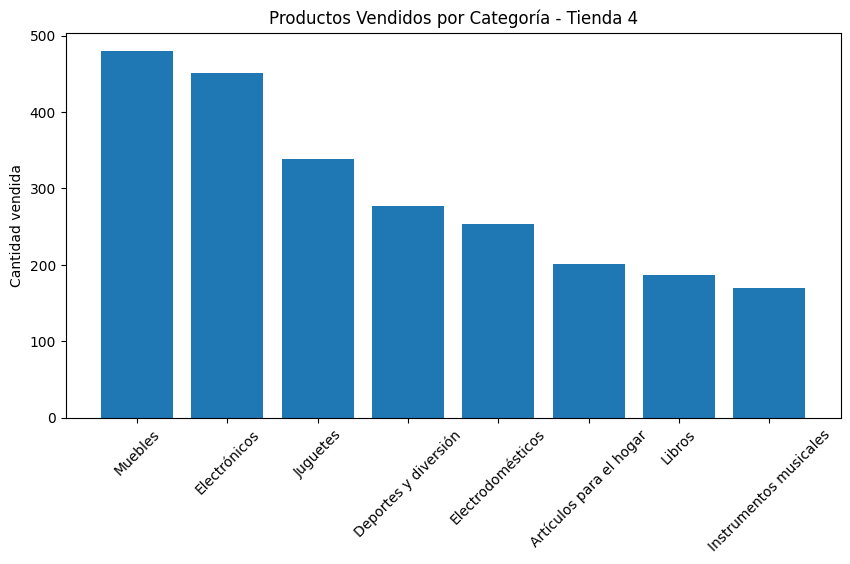

In [ ]:
productos_vendidos = []
for tienda in tiendas:
    categoria_vendidos = tienda.groupby("Categoría del Producto")["Precio"].count().sort_values(ascending=False).to_dict()
    productos_vendidos.append(categoria_vendidos)
print("productos vendidos por categoría en cada tienda: ")
for i, categoria_vendidos in enumerate(productos_vendidos, start=1):
    print(f"Tienda {i}:")
    for categoria, total in categoria_vendidos.items():
        print(f"  {categoria}: {total}")
    plt.figure(figsize=(10,5))
    plt.bar(categoria_vendidos.keys(), categoria_vendidos.values())
    plt.title(f"Productos Vendidos por Categoría - Tienda {i}")
    plt.xticks(rotation=45)
    plt.ylabel("Cantidad vendida")
    plt.show()




# 3. Calificación promedio de la tienda


In [ ]:
calificacion = []
for tienda in tiendas:
    calificacion.append(round(tienda["Calificación"].mean(), 2))
print("calificacion promedio en cada tienda: ")
for i, calif in enumerate(calificacion, start=1):
    print(f"Tienda {i}: {calif}")

calificacion promedio en cada tienda: 
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


# 4. Productos más y menos vendidos

Productos mas y menos vendidos en cada tienda:
Tienda 1:
Producto más vendido: TV LED UHD 4K
Top 10: TV LED UHD 4K, Microondas, Armario, Secadora de ropa, Bloques de construcción, Mesa de noche, Balón de baloncesto, Vaso térmico, Impresora, Refrigerador
Producto menos vendido: Auriculares con micrófono
Low 10: Cuerda para saltar, Muñeca bebé, Mesa de comedor, Dinosaurio Rex, Ciencia de datos con Python, Mochila, Pandereta, Olla de presión, Auriculares con micrófono, Celular ABXY


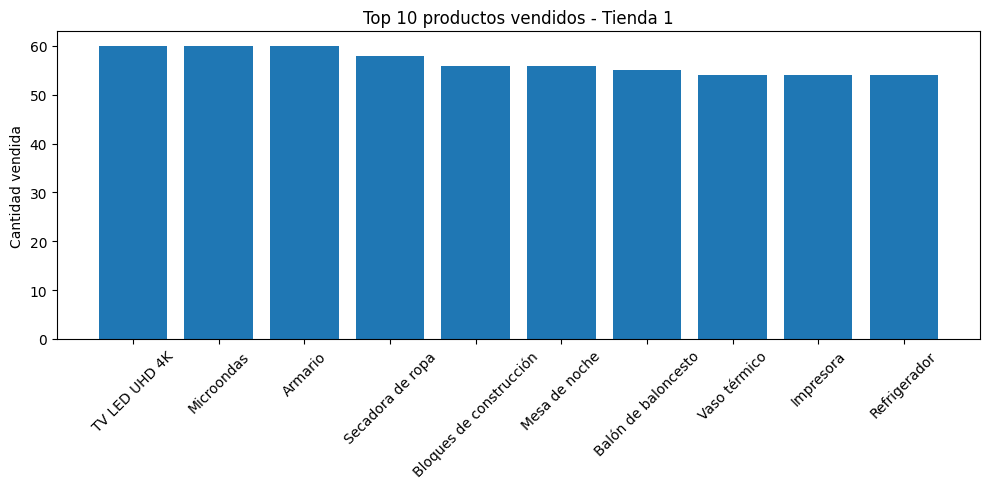

Tienda 2:
Producto más vendido: Iniciando en programación
Top 10: Iniciando en programación, Microondas, Batería, Pandereta, Guitarra acústica, Secadora de ropa, Iphone 15, Bloques de construcción, Armario, Set de ollas
Producto menos vendido: Juego de mesa
Low 10: Estufa, Celular ABXY, Smart TV, Cubertería, Asistente virtual, Auriculares, Sillón, Impresora, Mesa de comedor, Juego de mesa


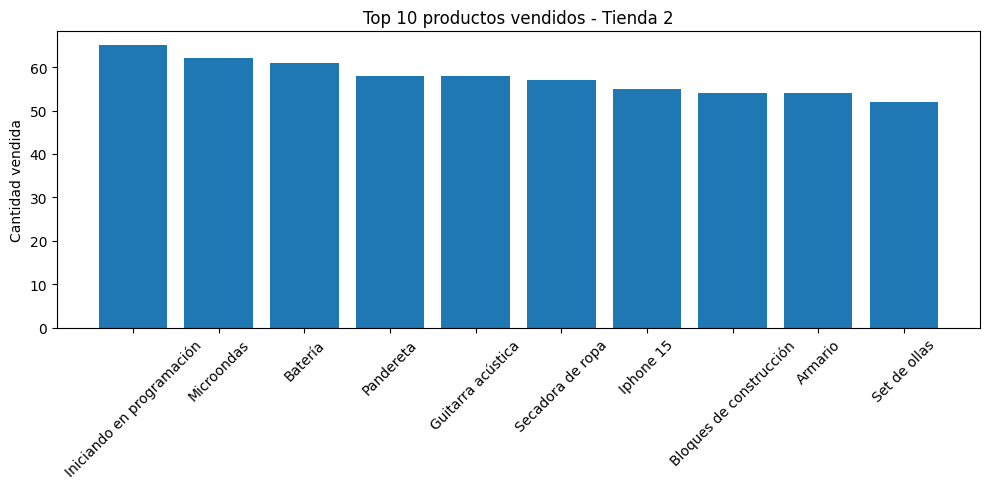

Tienda 3:
Producto más vendido: Kit de bancas
Top 10: Kit de bancas, Cama king, Mesa de comedor, Mesa de noche, Set de ollas, Smart TV, Modelado predictivo, Estufa, Cuerda para saltar, Juego de mesa
Producto menos vendido: Bloques de construcción
Low 10: Muñeca bebé, Cubertería, Auriculares con micrófono, Asistente virtual, Guitarra eléctrica, Vaso térmico, Mochila, Microondas, Set de vasos, Bloques de construcción


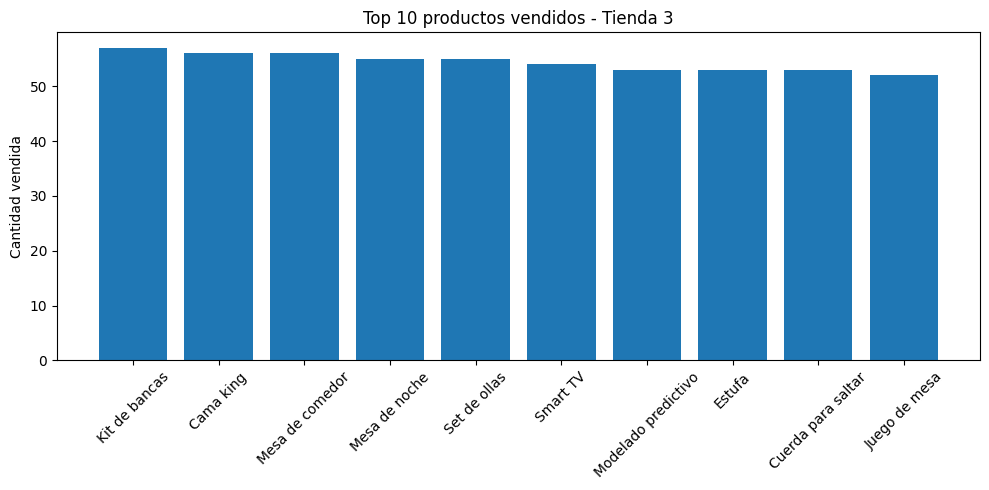

Tienda 4:
Producto más vendido: Cama box
Top 10: Cama box, Cubertería, Dashboards con Power BI, Cama king, Mesa de comedor, Mesa de noche, Carrito de control remoto, Bloques de construcción, Smart TV, Pandereta
Producto menos vendido: Guitarra eléctrica
Low 10: TV LED UHD 4K, Smartwatch, Celular ABXY, Ajedrez de madera, Refrigerador, Ciencia de datos con Python, Lavadora de ropa, Guitarra acústica, Armario, Guitarra eléctrica


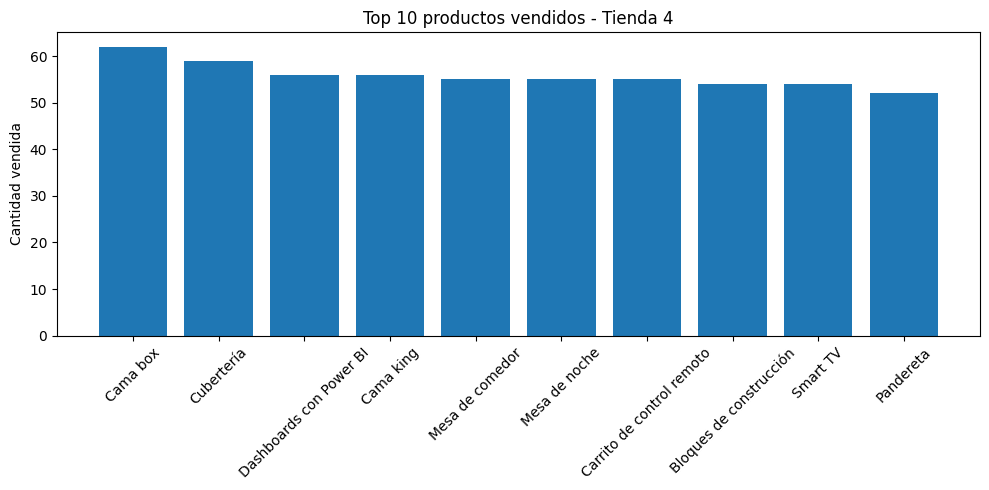

In [ ]:
"""En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda."""
productos = []
for tienda in tiendas:
    producto_conteo = tienda.groupby("Producto")["Precio"].count().sort_values(ascending=False).to_dict()
    productos.append(producto_conteo)
print("Productos mas y menos vendidos en cada tienda:")
for i, producto in enumerate(productos):
    print(f"Tienda {i+1}:")
    print("Producto más vendido:", max(producto, key=producto.get))
    print("Top 10:", ", ".join(list(producto.keys())[:10]))
    print("Producto menos vendido:", min(producto, key=producto.get))
    print("Low 10:", ", ".join(list(producto.keys())[-10:]))

    top10 = pd.Series(producto).nlargest(10)
    plt.figure(figsize=(10,5))
    plt.bar(top10.index, top10.values)
    plt.title(f"Top 10 productos vendidos - Tienda {i+1}")
    plt.ylabel("Cantidad vendida")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

Costo de envío promedio en cada tienda: 
Tienda 1: 26018.61


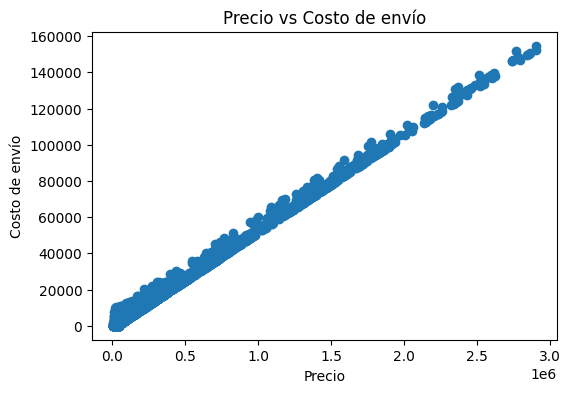

Tienda 2: 25216.24


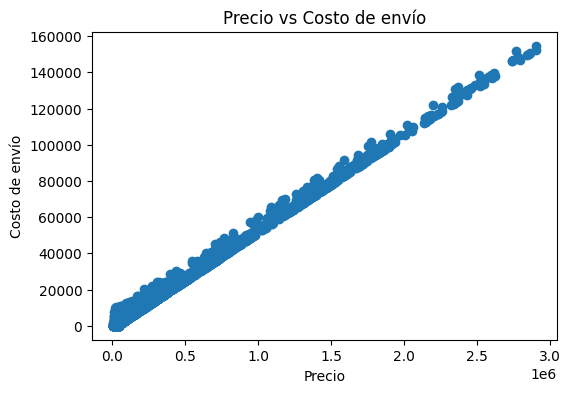

Tienda 3: 24805.68


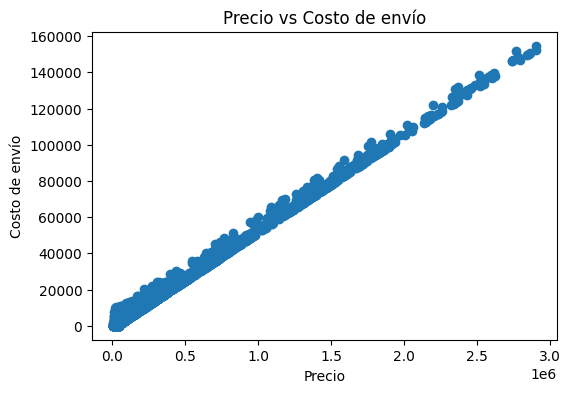

Tienda 4: 23459.46


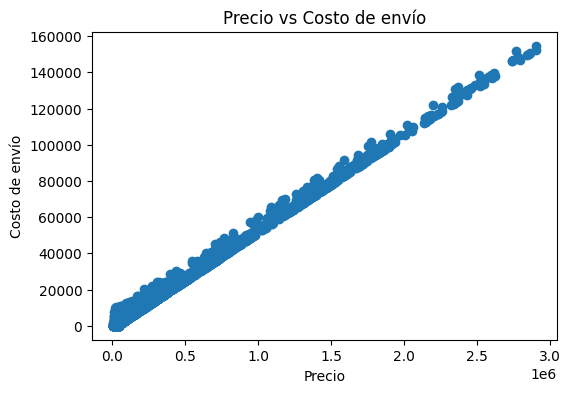

In [ ]:
envios = []
for tienda in tiendas:
    envios.append(round(tienda["Costo de envío"].mean(), 2))
print("Costo de envío promedio en cada tienda: ")
for i, envio in enumerate(envios, start=1):
    print(f"Tienda {i}: {envio}")
    plt.figure(figsize=(6,4))
    plt.scatter(tienda["Precio"], tienda["Costo de envío"])
    plt.title("Precio vs Costo de envío")
    plt.xlabel("Precio")
    plt.ylabel("Costo de envío")
    plt.show()


# 6. Análisis del desempeño geográfico

In [ ]:
from folium.plugins import HeatMap
for tienda in tiendas:
    mapa = folium.Map(
        location=[tienda["lat"].mean(), tienda["lon"].mean()],
        zoom_start=5
    )
    heat_data = tienda[["lat", "lon"]].values.tolist()

    HeatMap(heat_data).add_to(mapa)

    display(mapa)

In [19]:
for i, tienda in enumerate(tiendas, start=1):
    ventas_region = tienda.groupby("Lugar de Compra")["Precio"].sum().reset_index()
    print(f"Ventas por región en Tienda {i}:")
    print(ventas_region.sort_values("Precio", ascending=False).reset_index(drop=True))

Ventas por región en Tienda 1:
   Lugar de Compra       Precio
0           Bogotá  440005000.0
1         Medellín  296858100.0
2             Cali  154493700.0
3          Pereira   56214300.0
4           Cúcuta   37879500.0
5     Barranquilla   32907700.0
6        Cartagena   22296700.0
7         Riohacha   18512700.0
8      Bucaramanga   17579200.0
9            Pasto   14996400.0
10         Leticia   14669800.0
11     Santa Marta   13198300.0
12       Manizales    8027600.0
13   Villavicencio    7161900.0
14         Armenia    4615700.0
15          Soacha    4126000.0
16           Neiva    3494000.0
17         Inírida    2722500.0
18      Valledupar    1121300.0
Ventas por región en Tienda 2:
   Lugar de Compra       Precio
0           Bogotá  479959200.0
1         Medellín  297246700.0
2             Cali  118257600.0
3          Pereira   43073800.0
4           Cúcuta   28991500.0
5     Barranquilla   27741300.0
6      Bucaramanga   23895600.0
7        Cartagena   21548300.0
8         

# **Informe final — Evaluación de tiendas**
---
### **Introducción**

Se realizó un estudio comparativo de las cuatro tiendas de *Alura Store* para definir cuál conviene vender y así financiar un nuevo emprendimiento. El análisis consideró ingresos, desempeño de categorías, calificaciones de clientes y costos promedio de envío.

### **Resultados principales**

Los ingresos totales muestran diferencias claras:

- <font color="blue">Tienda 1</font>: 1,150,880,400

- <font color="yellow">Tienda 2</font>: 1,116,343,500

- <font color="green">Tienda 3</font>: 1,098,019,600

- <font color="red">Tienda 4</font>: 1,038,375,700

La <font color="red">Tienda 4</font> genera el menor ingreso, quedando por debajo de todas las demás.

Las ventas por categoría mantienen un patrón parecido entre tiendas, destacando **Muebles** y **Electrónicos** como principales fuentes de ventas. Las diferencias entre sucursales son menores, por lo que el rendimiento depende más del **volumen total vendido** que de categorías específicas.

Las calificaciones promedio son similares:

- Tienda 1: 3.98

- Tienda 2: 4.04

- Tienda 3: 4.05

- Tienda 4: 4.00

No existe una brecha grande en satisfacción; sin embargo, la <font color="red">Tienda 4</font> tampoco destaca.

Respecto al costo de envío, los valores descienden progresivamente desde la <font color="blue">Tienda 1</font> hasta la <font color="red">Tienda 4</font>:. Aunque la <font color="red">Tienda 4</font>: posee envíos más económicos, esa ventaja no compensa su menor facturación.

### **Conclusión**

La evidencia indica que la <font color="red">Tienda 4</font> presenta el rendimiento comercial más bajo, con menor ingreso total y sin ventajas claras en satisfacción o volumen de ventas frente a las otras sucursales.

Por ello, vender la <font color="red">Tienda 4</font> minimiza el impacto financiero y permite conservar las tiendas con mayor generación de ingresos, facilitando la inversión en el nuevo proyecto.